# Week 9-3 XOR Neural Network Coding
#### Machine Learning with Python by idebtor@gmail.com

-----------------------------------

## 1. XOR 신경망 클래스

In [3]:
class NeuralNetwork():
    """This class implements a multi-perceptron
       with backpropagation. This handles a simple logic
       such as OR, AND, NAND, and NOR gates, including XOR."""
    
    def __init__(self, net_arch, eta = 0.1, epochs = 10000, random_seed = 1):
        self.layers = len(net_arch)
        self.net_arch = net_arch
        self.eta  = eta
        self.epochs = epochs
        self.random_seed = random_seed
        
    def g(self, x):
        return 1 / (1 + np.exp((-x)))
    
    def g_prime(self, x):
        return self.g(x) * (1 - self.g(x))
    
    def fit(self, X, Y):
        np.random.seed(self.random_seed)
        W1_shape = (self.net_arch[(1)], self.net_arch[(0)])
        W2_shape = (self.net_arch[(2)], self.net_arch[(1)])
        self.W1 = 2 * np.random.random(W1_shape) - 1
        self.W2 = 2 * np.random.random(W2_shape) - 1
        
        self.cost_ = []
        
        for _ in range(self.epochs):
            A0 = X
            Z1 = np.dot(self.W1, A0)
            A1 = self.g(Z1)
            Z2 = np.dot(self.W2, A1)
            A2 = self.g(Z2)
            
            E2 = Y - A2
            E1 = np.dot(self.W2.T, E2)
            
            dZ2 = E2 * self.g_prime(Z2)
            dZ1 = E1 * self.g_prime(Z1)
            
            self.W2 += np.dot(dZ2, A1.T)
            self.W1 += np.dot(dZ1, A0.T)
            self.cost_.append(np.sqrt(np.sum(E2 * E2)))
        return self
    
    def net_input(self, X):
        if X.shape[0] == self.w.shape[0]:
            return np.dot(X, self.w)
        else:
            return np.dot(X, self.w[1:]) + self.w[0]
        
    def predict(self, X):
        Z1 = np.dot(self.W1, X)
        A1 = self.g(Z1)
        Z2 = np.dot(self.W2, A1)
        A2 = self.g(Z2)
        return A2

## 2. XOR 신경망 학습 결과: 은닉층 노드 3개

In [4]:
import numpy as np
nn = NeuralNetwork(net_arch = [2, 3, 1], epochs = 1000)
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([0, 1, 1, 0])
nn.fit(X, Y)
print("Final prediction of all")
A2 = nn.predict(X)
for x, yhat in zip(X.T, A2.T):
    print(x, np.round(yhat, 3))

Final prediction of all
[0 0] [0.048]
[0 1] [0.955]
[1 0] [0.499]
[1 1] [0.501]


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


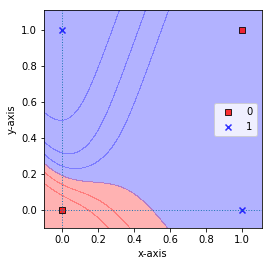

In [5]:
import joy
import matplotlib.pyplot as plt
%matplotlib inline
joy.plot_decision_regions(X.T, Y, lambda Z: nn.predict(Z.T))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc = 'best')
plt.show()

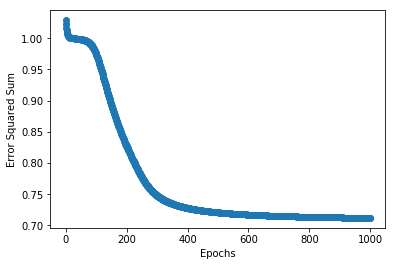

In [6]:
plt.plot(range(len(nn.cost_)), nn.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

## 3. XOR 신경망 학습 결과: 은닉층 노드 4개

In [7]:
nn = NeuralNetwork(net_arch = [2, 4, 1], epochs = 1000)
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([0, 1, 1, 0])
nn.fit(X, Y)
print("Final prediction of all")
A2 = nn.predict(X)
for x, yhat in zip(X.T, A2.T):
    print(x, np.round(yhat, 3))

Final prediction of all
[0 0] [0.077]
[0 1] [0.935]
[1 0] [0.94]
[1 1] [0.043]


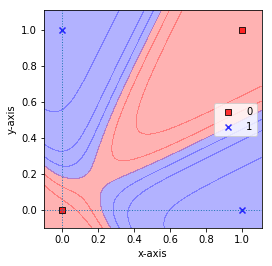

In [8]:
joy.plot_decision_regions(X.T, Y, lambda z : nn.predict(z.T))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc = 'best')
plt.show()

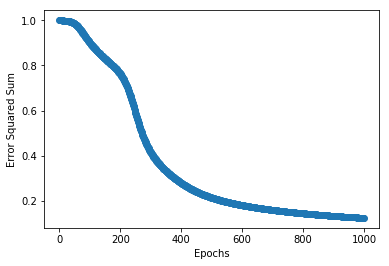

In [9]:
plt.plot(range(len(nn.cost_)), nn.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

-------
_Rejoice always, pray continually, give thanks in all circumstances; for this is God’s will for you in Christ Jesus. (1 Thes 5:16-18)_